#**Montar Google Drive**

In [1]:
# Conectar com o Google Drive

from google.colab import drive
drive.mount('/content/drive')

#Conectando o ambiente ao Google Drive

Mounted at /content/drive


#**Importar Biblioteca**


In [2]:
#Importar bibliotecas utilizadas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.pipeline import Pipeline
%pylab inline
from sklearn.model_selection import GridSearchCV


Populating the interactive namespace from numpy and matplotlib


In [3]:
#Importar base de dados
uri = '/content/drive/Shareddrives/Colab_Grupo2/Colab/Data/dataFrameSelecionado.csv'

#Transformar em dataset e guardar em uma váriavel
df = pd.read_csv(uri)	

#**Amostragem dos dados**



In [4]:
# Divide as colunas em variaveis X e y
X = df.drop('follow_up_days', axis=1).copy()
y = df[['follow_up_days']].copy()

# Definindo o tamanho das amostras 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

#**Criando máquina preditiva com logística**

In [5]:
# Criação do modelo
modelo = LogisticRegression()

# Treinamento do modelo
modelo.fit(X_train, y_train)

y_predict = modelo.predict(X_test)

# Score do modelo nos dados de teste
result = modelo.score(X_test, y_test)
print("Acurácia nos dados de teste: %.3f%%" % (result * 100.0)) 

Acurácia nos dados de teste: 59.925%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#**Avaliando a máquina sem hiperparâmetros**

In [6]:
#Avaliando a máquina

print('Classification metrics: \n', classification_report(y_test, y_predict))

#Medindo a taxa de erro do modelo
mse = metrics.mean_squared_error(y_test, y_predict)
print('MSE (Mean-Squared-Error): %s' %mse)

Classification metrics: 
               precision    recall  f1-score   support

           0       0.65      0.32      0.43       225
           1       0.54      0.80      0.64       327
           2       0.73      0.59      0.65       244

    accuracy                           0.60       796
   macro avg       0.64      0.57      0.57       796
weighted avg       0.63      0.60      0.58       796

MSE (Mean-Squared-Error): 0.5025125628140703


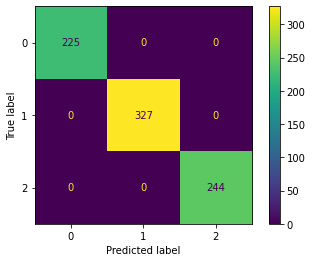

In [7]:
mse = metrics.mean_squared_error(y_test, y_test)
acu = metrics.accuracy_score(y_test, y_test) 

#print('MSE (Mean-Squared-Error): %s' %mse)
#print('Accuracy: %s' %acu)

#Medir a taxa de erro e a acurácia do modelo

ConfusionMatrixDisplay(confusion_matrix(y_test, y_test)).plot()

#**Criar modelo com o método GridSearch para definir os melhores hiperparâmetros**


In [8]:
modelo = LogisticRegression()

# Cria o GridSearchCV

parameters = {'penalty':['l1', 'l2', 'elasticnet', 'none'], 
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

modelGS = GridSearchCV(modelo, parameters)

# Treina os modelos e guarda na variável modelGS o melhor modelo
modelGS.fit(X_train, y_train)
modelGS.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'penalty': 'l2', 'solver': 'newton-cg'}

In [9]:
print(modelGS.best_score_)
print(modelGS.best_params_)

0.6488522259411748
{'penalty': 'l2', 'solver': 'newton-cg'}


In [10]:
modelGS.best_params_

{'penalty': 'l2', 'solver': 'newton-cg'}

In [11]:
reglog_best = modelGS.best_estimator_
reglog_best

LogisticRegression(solver='newton-cg')

In [12]:
# import métricas
from sklearn.metrics import recall_score, precision_score, f1_score

y_pred = reglog_best.predict(X_test)
print('Acc treino: ', reglog_best.score(X_train, y_train ))
print('Acc teste: ', reglog_best.score(X_test, y_test.squeeze() ))
print( 'Revocação: ', recall_score(y_test, y_pred, average='micro'))
print( 'Precisão: ', precision_score( y_test, y_pred, average='micro' ))
print( 'F1_score: ', f1_score(y_test, y_pred, average='micro' ))

Acc treino:  0.6513674944985853
Acc teste:  0.6482412060301508
Revocação:  0.6482412060301508
Precisão:  0.6482412060301508
F1_score:  0.6482412060301508


#**Avaliando a máquina com hiperparâmetros**




In [13]:
# Avaliando a máquina com hiperparâmetros

print('Classification metrics: \n', classification_report(y_test, y_pred))

#Medindo a taxa de erro do modelo
mse = metrics.mean_squared_error(y_test, y_predict)
print('MSE (Mean-Squared-Error): %s' %mse)

Classification metrics: 
               precision    recall  f1-score   support

           0       0.70      0.47      0.56       225
           1       0.60      0.78      0.68       327
           2       0.70      0.64      0.67       244

    accuracy                           0.65       796
   macro avg       0.67      0.63      0.64       796
weighted avg       0.66      0.65      0.64       796

MSE (Mean-Squared-Error): 0.5025125628140703
